In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Iris.csv")
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df.drop(['Id', 'Species'], axis=1)

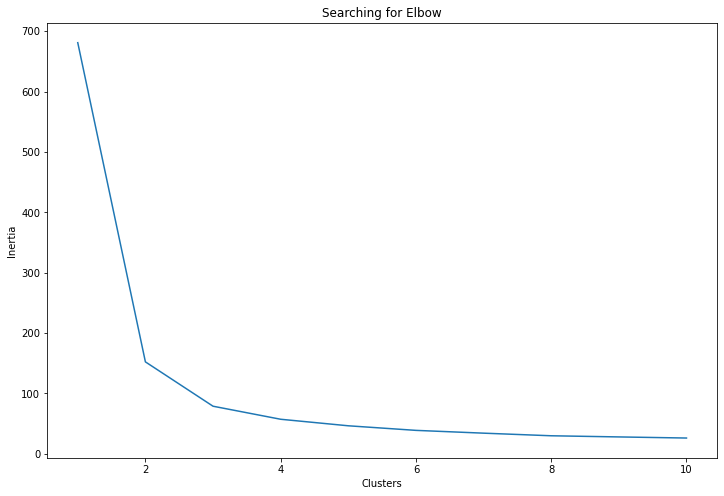

In [4]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
clusters = []

for i in range(2, 11):
    cluster_labels = KMeans(n_clusters=i).fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,

    )

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.49285559183161204
For n_clusters = 6 The average silhouette_score is : 0.36820569682713084
For n_clusters = 7 The average silhouette_score is : 0.3577679999335413
For n_clusters = 8 The average silhouette_score is : 0.3608281950148643
For n_clusters = 9 The average silhouette_score is : 0.34879608910057
For n_clusters = 10 The average silhouette_score is : 0.3457120176767065


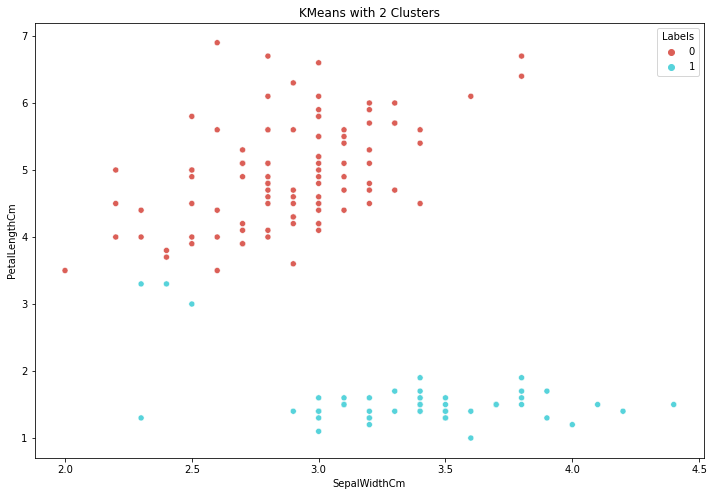

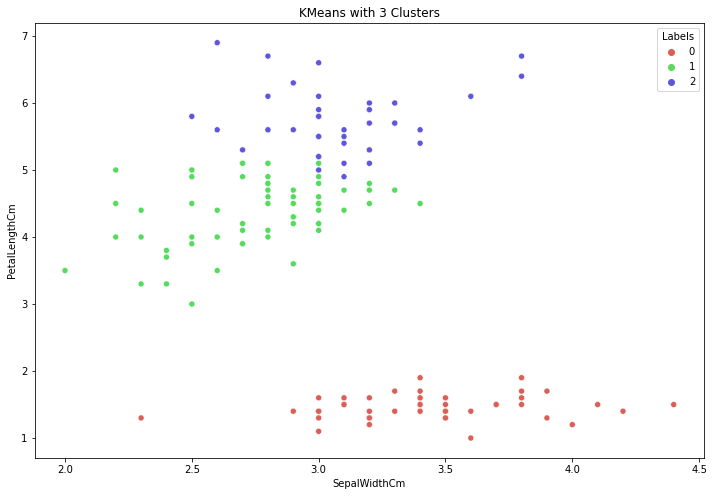

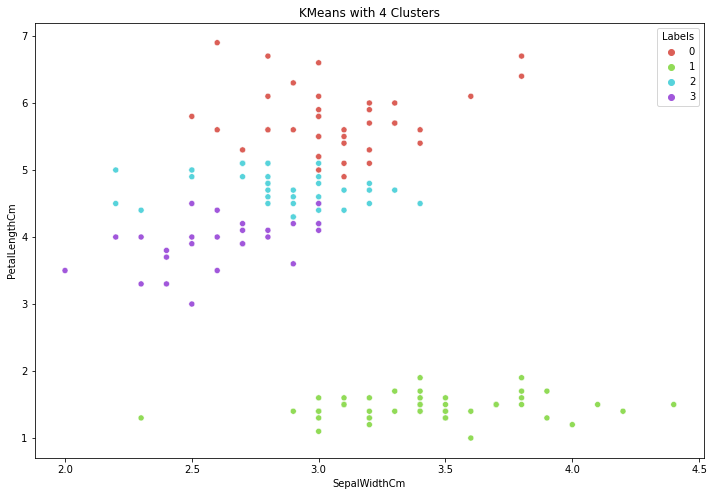

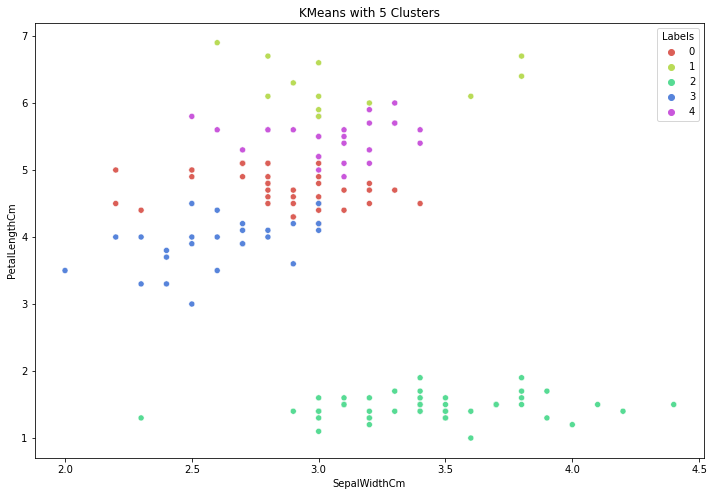

In [6]:
km2 = KMeans(n_clusters=2).fit(X)

X['Labels'] = km2.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['SepalWidthCm'], X['PetalLengthCm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')

km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['SepalWidthCm'], X['PetalLengthCm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')

km4 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['SepalWidthCm'], X['PetalLengthCm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')


km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['SepalWidthCm'], X['PetalLengthCm'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')

plt.show()

In [7]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, km2.labels_, metric='euclidean')
#Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.
#чем ближе к 1 тем лучше
print(f'Силуэт: {score}')

Силуэт: 0.5263220989321387


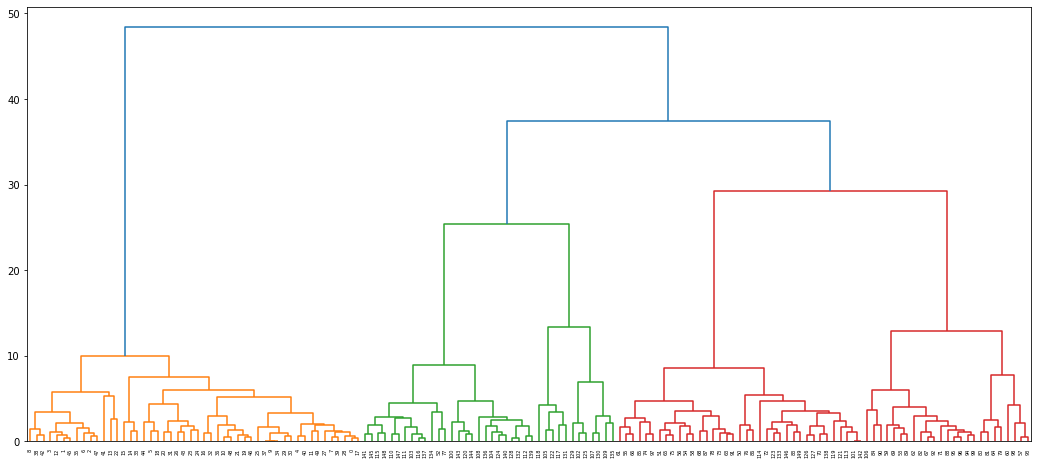

In [8]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
Z = hierarchy.linkage(dist, 'complete')

plt.figure(figsize=(18, 8))
dendro = hierarchy.dendrogram(Z)

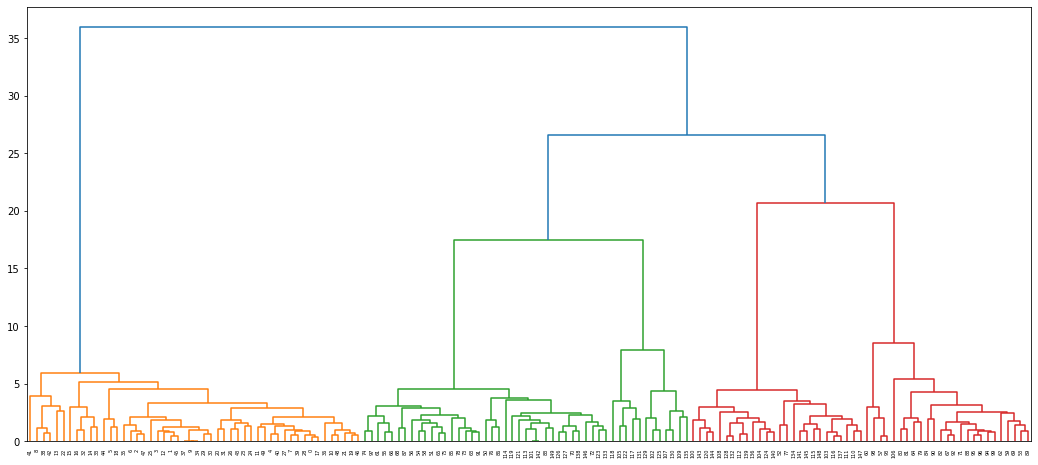

In [9]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 8))
dendro = hierarchy.dendrogram(Z)


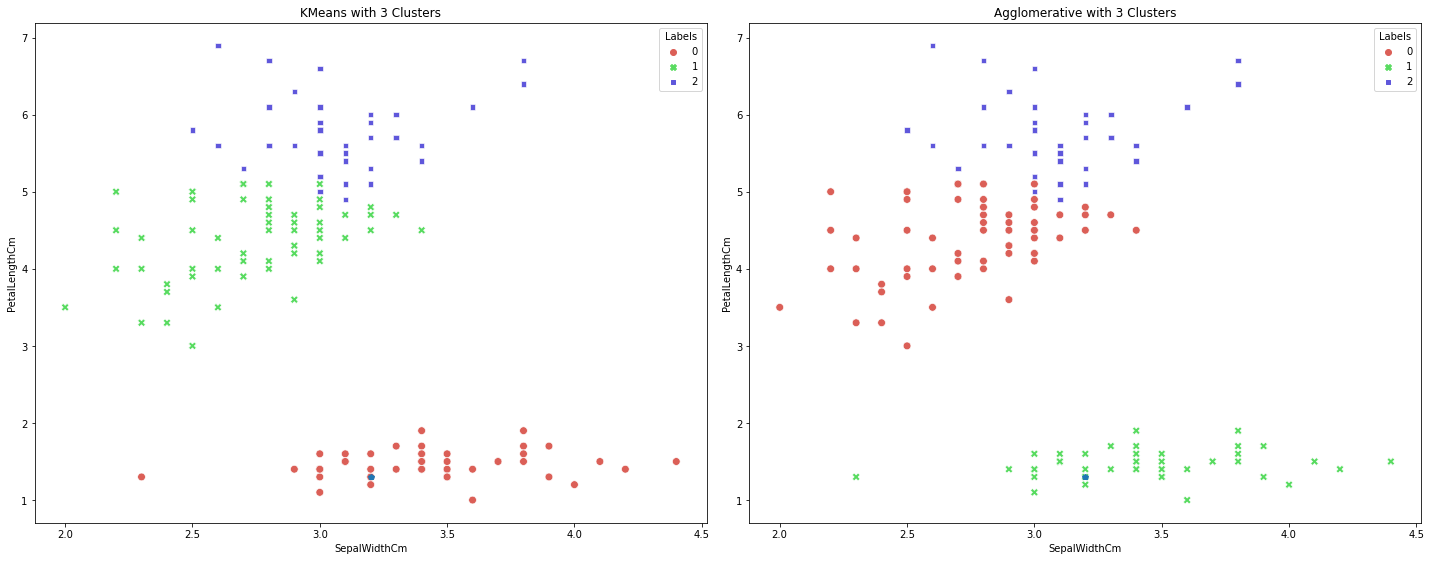

In [15]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km3 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km3.labels_
sns.scatterplot(X['SepalWidthCm'], X['PetalLengthCm'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('KMeans with 3 Clusters')

point = X.iloc[42]

plt.plot(point['SepalWidthCm'], point['PetalLengthCm'],'p')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['SepalWidthCm'], X['PetalLengthCm'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('Agglomerative with 3 Clusters')

point = X.iloc[42]

plt.plot(point['SepalWidthCm'], point['PetalLengthCm'],'p')

plt.tight_layout()
plt.show()

In [11]:
score = silhouette_score(X, agglom.labels_, metric='euclidean')
#Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.
#чем ближе к 1 тем лучше
print(f'Силуэт: {score}')

Силуэт: 0.5758308180303738
